In [0]:
from  google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
!unzip "/content/gdrive/My Drive/Colab Notebooks/LOGO RECOGNITION/flickr_logos_27_dataset_images.zip"

unzip:  cannot find or open /content/gdrive/My Drive/Colab Notebooks/LOGO RECOGNITION/flickr_logos_27_dataset_images.zip, /content/gdrive/My Drive/Colab Notebooks/LOGO RECOGNITION/flickr_logos_27_dataset_images.zip.zip or /content/gdrive/My Drive/Colab Notebooks/LOGO RECOGNITION/flickr_logos_27_dataset_images.zip.ZIP.


In [0]:
!ls

In [0]:
import pandas as pd
import os
import shutil
import numpy as np
from keras.models import Sequential
from keras.layers import Convolution2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.preprocessing.image import ImageDataGenerator
from IPython.display import display
from keras.preprocessing import image
import matplotlib.pyplot as plt
import glob
import cv2
from PIL import Image
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [0]:
df = pd.read_csv("/content/gdrive/My Drive/Colab Notebooks/LOGO RECOGNITION/flickr_logos_27_dataset_training_set_annotation.txt", sep='\s+',header=None)

src_dir = "flickr_logos_27_dataset_images"
train_dir = "FLICK1"
valid_dir = "FLICK2"
dest = "LOGOS"

if not os.path.exists(dest):
    os.makedirs(dest)

if not os.path.exists(train_dir):
    os.makedirs(train_dir)

if not os.path.exists(valid_dir):
    os.makedirs(valid_dir)

In [0]:
X = df.iloc[:,0]
Y = df.iloc[:,1]

A = df.iloc[:,3]
B = df.iloc[:,4]
C = df.iloc[:,5]
D = df.iloc[:,6]

y = list(set(list(Y)))
y.sort()


for i in y:
    os.makedirs(os.path.join(train_dir,i))

for i in y:
    os.makedirs(os.path.join(valid_dir,i))



In [0]:
for i in range(len(X)):
    try:
        des = os.path.join(valid_dir,Y[i])
        for res in glob.iglob(os.path.join(src_dir,X[i])):
            shutil.copy(res,des)
    except:
        pass


In [0]:
train = ImageDataGenerator(rescale=1./255,
horizontal_flip=True,
vertical_flip=True,
shear_range=0.2,
zoom_range=0.2,
featurewise_center=True, # Set input mean to 0 over the dataset, feature-wise
featurewise_std_normalization=True, # Divide inputs by std of the dataset, feature-wise
zca_whitening=True, # Apply ZCA whitening
rotation_range=20, # Degree range for random rotations
width_shift_range=0.2,
height_shift_range=0.2,
fill_mode='nearest',
validation_split=0.2)

valid = ImageDataGenerator(rescale=1./255)

HEIGHT = 32
WIDTH = 64
BATCH_SIZE = 64


trainset = train.flow_from_directory("FLICK2/",
target_size = (WIDTH,HEIGHT),
batch_size = BATCH_SIZE,
shuffle=True,
seed=42,
color_mode='rgb',
classes=y,
class_mode='categorical')

validset = valid.flow_from_directory("FLICK2/",
target_size = (WIDTH,HEIGHT),
batch_size = BATCH_SIZE,
shuffle=True,
seed=42,
color_mode='rgb',
classes=y,
class_mode = 'categorical')

/usr/local/lib/python3.6/dist-packages/keras/preprocessing/image.py:650: UserWarning: This ImageDataGenerator specifies `zca_whitening` which overrides setting of`featurewise_std_normalization`.
  warnings.warn('This ImageDataGenerator specifies '


Found 810 images belonging to 27 classes.
Found 810 images belonging to 27 classes.


In [0]:
model = Sequential()

model.add(Convolution2D(filters=32,kernel_size=(3,3),input_shape=(64,32,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Convolution2D(filters=64,kernel_size=(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Convolution2D(filters=128,kernel_size=(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(output_dim=256,activation='relu'))
model.add(Dense(output_dim=27,activation='softmax'))
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=256)`
  del sys.path[0]
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="softmax", units=27)`
  


In [0]:

model.fit_generator(generator = trainset,
                    epochs = 10000,
                    validation_data = validset)

In [0]:
model.save('LOGOCNN.h5')

In [0]:
from google.colab import files
files.download('LOGOCNN.h5')

In [0]:
df = pd.read_csv("/content/gdrive/My Drive/Colab Notebooks/LOGO RECOGNITION/flickr_logos_27_dataset_query_set_annotation.txt", sep='\s+',header=None)
M = df.iloc[:,0]

In [0]:
def predimage(path):
    img = Image.open(path)
    plt.imshow(img)
    test = image.load_img(path,target_size=(64,32))
    test = image.img_to_array(test)
    test = np.expand_dims(test,axis=0)
    result = model.predict(test)
    print(result)
    y_class = result.argmax(axis=-1)
    print(y[y_class[0]])

In [0]:
y

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0.]]
Google


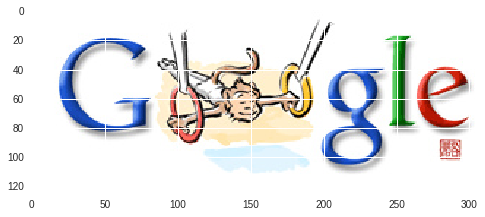

In [0]:
predimage(os.path.join(src_dir,M[49]))